In [1]:
import random 

import matplotlib.pyplot as plt
%matplotlib inline

# **PROBABILITY AS LIMITING FREQUENCY**

As you know, one of the possible interpretations of probability if that it's the *limiting frequency* of the event in an infinite series of trials. 

For example, according to this interpretation, the fact that the probability of getting Heads when flipping a coin is 0.5 means that if we flip a coin more and more times in a row, the fraction of times Heads appear gets closer to 0.5. When the number of the tosses is set to infinity, the lmiting frequency of Heads is 0.5.

In this notebook, you'll run a couple of experiments to get more famliar with this interpretation of probability.

## **Flipping a coin**

[John Kerrich](https://en.wikipedia.org/wiki/John_Edmund_Kerrich) was a mathematician noted for a series of experiments in probability which he conducted while interned in Nazi-occupied Denmark in the 1940s. In arguably the most famous of his experiments, Kerrich tossed a fair coin as many as 10,000 times. By recording the number of heads obtained as the trials continued, Kerrich was able to demonstrate that the proportion of heads obtained asymptotically approached the theoretical value of 0.5.

Your task is to repeat the experiment. Luckily, you have Python to help you, so you don't have to toss a coin yourself.

Your task is to:
1. model a signle coin toss;
2. model a series of $N = 10000$ coin tosses;
3. visuzalize how the frequency of Heads changes as the number of tosses grows;
4. repeat the experiment for a biased coin.

You can fill in the code below to complete the task, or write your own code from scratch.

In [2]:
def flip_coin(p=0.5):
  """ 
  A fucntion that simulates tossing a coin.
  
  Parameters:
  p - the probability of Heads 
  (default value 0.5 corresponds to a fair coin)

  Returns:
  1 for Heads and 0 for Tails.
  
  """
  if random.random() <= p:
    return 1
  else:
    return 0

In [3]:
def run_trial(N, p=0.5):
  """
  The function that performs a series of coin tosses
  and records the frequency of heads.

  Parameters:
  N - number of tosses to perform
  p - probability of Heads at each toss
  (default value 0.5 corresponds to a fair coin)

  Returns:
  heads_freq - a list of frequencies of Heads 
  after 10, 20, 30, ..., N tosses

  """
  num_heads = 0
  heads_freq = []

  for i in range(1, N+1):
    num_heads += flip_coin(p)
    if (i%10 == 0):
      heads_freq.append(num_heads/i)

  return heads_freq

Now, run the experiment! You can start with $N = 10000$ tosses of a fair coin ($p = 0.5$).

In [33]:
N = 5000

p_fair = 0.5
heads_freq_fair = run_trial(N, p=p_fair)

p_biased = 0.55
heads_freq_biased = run_trial(N, p=p_biased)

Let's visuzlize the result. Plot the frequency of Heads with respect to the number of tosses performed.

What do you observe?

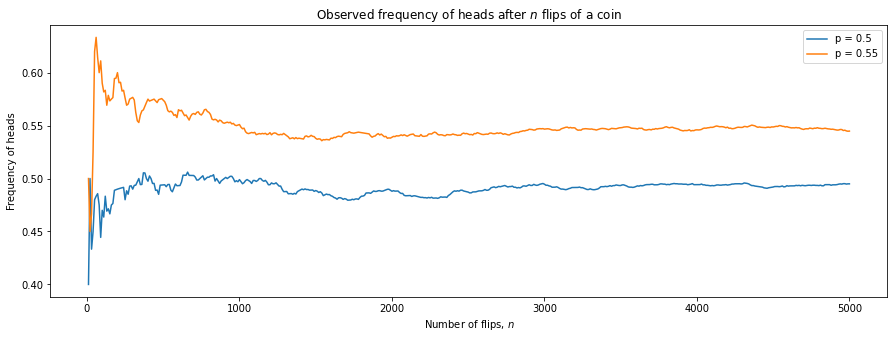

In [34]:
plt.figure(figsize=(15, 5))
plt.plot(range(10, N+1, 10), heads_freq_fair)
plt.plot(range(10, N+1, 10), heads_freq_biased)

_ = plt.xlabel('Number of flips, $n$')
_ = plt.ylabel('Frequency of heads')
_ = plt.title('Observed frequency of heads after $n$ flips of a coin')

_ = plt.legend(['p = ' + str(p_fair),
                'p = ' + str(p_biased)])

Now, repeat the experiment, but change the $p$ parameter to consider a biased coin.

What do you observe?


## **Generating bit-strings**

What is the probability of randomly generating a bit-string of lenght $n = 5$ that contains $1$ exactly once?

You already know the theoretical answer: there are $2^5$ possible bit-strings of length $5$, and only $5$ of them contain digit $1$ exactly once ($10000, 01000, 00100, 00010, 00001$), so the probability to generate suchis a string is $5/32 = 0.15625$.

Now, let's perform an experiment similar to the one above to illustarte this.

You task is as follows:
1. define a function that generates a random bit-string of a given length;
2. generate a large number of bit-strings one-by-one, recording the frequency of those containing digit $1$ exactly once every now and then;
3. visualize how this frequency changes as the number of generated strings grows.

You can fill in the code below to complete the task, or write your own code from scratch.

In [6]:
def generate_bitstring(len=5):
  """
  A function that generates a random bit-string of a given length

  Parameters:
  len - the length of the bit-string

  Returns:
  a list of n  elements (0s and 1s) 
  that represents a random bit-string
  """
  return [random.randint(0,1) for i in range(len)]

In [19]:
def run_trials_strings(N, len, num_rep=1):
  """
  A function that generates N random bit strings one-by-one
  and records the frequency of those that contain digit 1 exactly once

  Parameters:
  N - number of strings to generate
  len - length of each string

  Returns:
  freq - the list of frequencies of strings that contain digit 1 exactly once 
  for every additional 10 strings generated
  
  """
  count = 0
  freq = []

  for i in range(1, N+1):
    string = generate_bitstring(len)
    num_ones = string.count(1)
    if (num_ones == num_rep):
      count += 1
    if (i%10 == 0):
      freq.append(count/i)

  return freq

In [35]:
N = 10000
len = 5

freq_strings_once = run_trials_strings(N, len)
freq_strings_twice = run_trials_strings(N, len, num_rep=2)
freq_strings_none = run_trials_strings(N, len, num_rep=0)

Let's visuzlize the result. Plot the frequency of the bit-strings containing just one $1$ as the number of generated strings increases.

What do you observe?

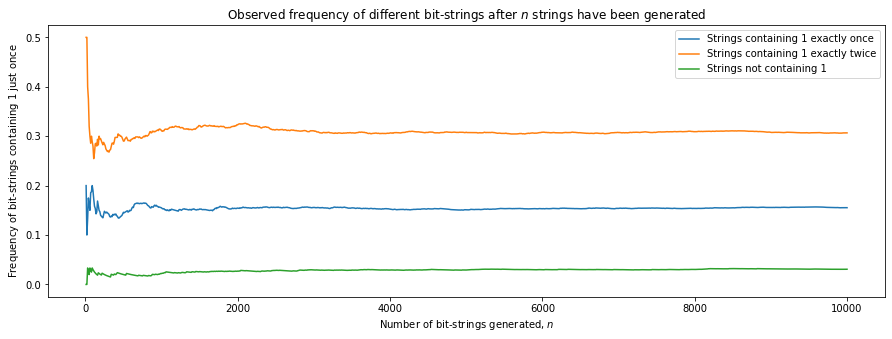

In [36]:
plt.figure(figsize=(15, 5))
plt.plot(range(10, N+1, 10), freq_strings_once)
plt.plot(range(10, N+1, 10), freq_strings_twice)
plt.plot(range(10, N+1, 10), freq_strings_none)


_ = plt.xlabel('Number of bit-strings generated, $n$')
_ = plt.ylabel('Frequency of bit-strings containing $1$ just once')
_ = plt.title('Observed frequency of different bit-strings after $n$ strings have been generated')

_ = plt.legend(['Strings containing 1 exactly once',
                'Strings containing 1 exactly twice',
                'Strings not containing 1'])

You can now experiment with the length of the bit-strings generated, as well as compute probability of generating different types of strings.  